In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# from subprocess import call
from subprocess import Popen, PIPE, call
from scipy.optimize import curve_fit
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

/var/folders/m0/czh93qvd5t1g803_x1pzy8g00000gt/T/ipykernel_1286/114006865.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


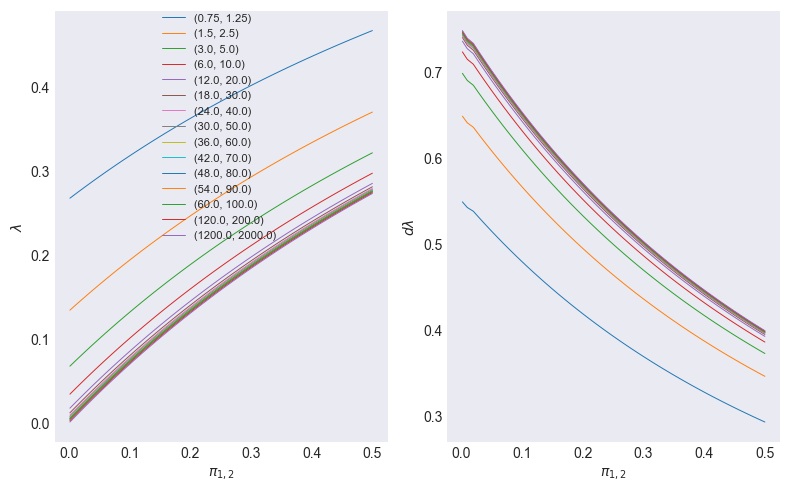

In [57]:
# plt.style.use('seaborn-dark')
Delta = 0.250
# q_pairs = [(6.0,10.0), (12.0, 20.0), (18.0,30.0), (24.0,40.0)]
base_q_pair = (6.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,11)]
q_pairs.extend([(120.0, 200.0), (1200.0, 2000.0)])
q_pairs.insert(0, (3.0, 5.0))
q_pairs.insert(0, (1.5, 2.5))
q_pairs.insert(0, (0.75, 1.25))
x = 2
fig, ax= plt.subplots(1,2, figsize=(8,5))

for q_pair in q_pairs:
    if not os.path.exists(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv'):
        call(f'python find_Tlines_sym.py {q_pair[0]} {q_pair[1]} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    ax[0].plot(tline['pi'], tline['lambda'], lw=0.7, label=f'{q_pair}')
    dlambda = (np.array(tline['lambda'].iloc[1:]) - np.array(tline['lambda'].iloc[:-1]))/(np.array(tline['pi'].iloc[1:]) - np.array(tline['pi'].iloc[:-1]))
    ax[1].plot(tline.pi[1:], dlambda, lw=0.7)
ax[0].set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$') # , xlim=(0,0.5), ylim=(0,1)
ax[1].set(xlabel='$\pi_{1,2}$', ylabel='$d \lambda$') # , xlim=(0,0.5), ylim=(0,1)
fig.legend(fontsize=8, loc=(0.2,0.5))
fig.tight_layout()

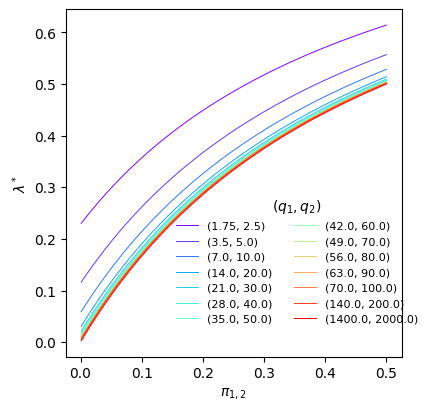

In [21]:
# plt.style.use('default')
base_q_pair = (7.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,11)]
q_pairs.extend([(140.0, 200.0), (1400.0, 2000.0)])
q_pairs.insert(0, (3.5, 5.0))
q_pairs.insert(0, (1.75, 2.5))
# q_pairs.insert(0, (0.75, 1.25))
x = 2
colors = plt.cm.rainbow(np.linspace(0,1,len(q_pairs)))


# fig, ax= plt.subplots(1,2, figsize=(8,5))
fig, ax= plt.subplots(1,1, figsize=(4,4), constrained_layout=True)

for q_pair,c in zip(q_pairs,colors):
    if not os.path.exists(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv'):
        call(f'python find_Tlines_sym.py {q_pair[0]} {q_pair[1]} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    # ax[0].plot(tline['pi'], tline['lambda'], lw=0.7, label=f'{q_pair}')
    # dlambda = (np.array(tline['lambda'].iloc[1:]) - np.array(tline['lambda'].iloc[:-1]))/(np.array(tline['pi'].iloc[1:]) - np.array(tline['pi'].iloc[:-1]))
    # ax[1].plot(tline.pi[1:], dlambda, lw=0.7)
    ax.plot(tline['pi'], tline['lambda'], lw=0.7, color=c, label=f'{q_pair}')
# ax[0].set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$') # , xlim=(0,0.5), ylim=(0,1)
# ax[1].set(xlabel='$\pi_{1,2}$', ylabel='$d \lambda$') # , xlim=(0,0.5), ylim=(0,1)
ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda^*$') # , xlim=(0,0.5), ylim=(0,1)    
fig.legend(fontsize=8, loc=(0.4,0.2), ncol=2, frameon=False, title=r'$(q_1, q_2$)')
# fig.tight_layout()
fig.savefig(f'Q_Tlines_sym_dif_q_pairs_base_q1_{base_q_pair[0]}_q2_{base_q_pair[1]}.png')

### Let's see how fi change as we increase the value of the qualities...

In [24]:
# get the values
q_pairs = [(3.5,5.0), (7.0,10.0), (14.0, 20.0), (140.0, 200.0)]
ls = np.arange(0.05, 1.0, 0.05)
pi1, pi2 = 0.1, 0.1
q_pairs_fs_evo = {}

for q_pair in q_pairs:
    fs_evo = [[],[],[]]
    for l in ls:
        # call(f'python f0poly_sols_clean.py {pi1} {pi2} {q_pair[0]} {q_pair[1]} {l} > sols.dat')
        p = Popen(f'python f0poly_sols_clean.py {pi1} {pi2} {q_pair[0]} {q_pair[1]} {l}', shell=True, stdin=PIPE, stdout=PIPE, stderr=PIPE)
        output, err = p.communicate()
        fs = [float(o) for o in output.split(b' ')]
        for i in range(3):
            fs_evo[i].append(fs[i])
    q_pairs_fs_evo[q_pair] = fs_evo

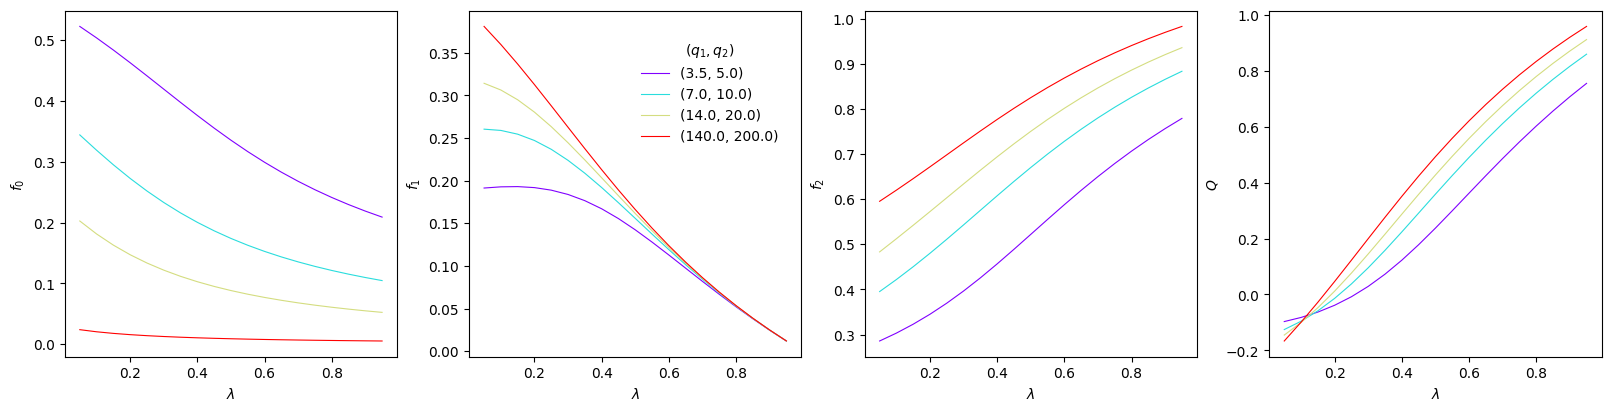

In [25]:
fig, ax = plt.subplots(1,4, figsize=(16,4), constrained_layout=True)

colors = plt.cm.rainbow(np.linspace(0,1,len(q_pairs)))

for i,(q_pair,fs_evo) in enumerate(q_pairs_fs_evo.items()):
    c = colors[i]
    ax[0].plot(ls, fs_evo[0], lw=0.8, color=c)
    ax[1].plot(ls, fs_evo[1], lw=0.8, color=c, label=q_pair)
    ax[2].plot(ls, fs_evo[2], lw=0.8, color=c)
    Q = [f2-2*f1 for f1,f2 in zip(fs_evo[1],fs_evo[2])]
    ax[3].plot(ls, Q, lw=0.8, color=c)
for i in range(4):
    ax[i].set_xlabel('$\lambda$')
    if i == 3:
        ax[i].set_ylabel('$Q$')
    else:
        ax[i].set_ylabel(fr'$f_{i}$')
ax[1].legend(title='$(q_1, q_2)$', frameon=False, loc=(0.5, 0.6), ncol=1)
fig.savefig(f'fs_and_Q_diferent_q_pairs_same_delta_pi1_{pi1}_pi2_{pi2}.png')

### and let's see what happens with the other deffinition of consensus, Q' = f2 - max(f0, xf1)

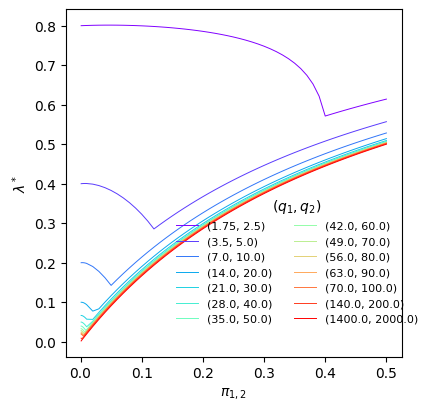

In [22]:
base_q_pair = (7.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,11)]
q_pairs.extend([(140.0, 200.0), (1400.0, 2000.0)])
q_pairs.insert(0, (3.5, 5.0))
q_pairs.insert(0, (1.75, 2.5))
# q_pairs.insert(0, (0.75, 1.25))
x = 2
colors = plt.cm.rainbow(np.linspace(0,1,len(q_pairs)))

fig, ax= plt.subplots(1,1, figsize=(4,4), constrained_layout=True)

for q_pair,c in zip(q_pairs,colors):
    if not os.path.exists(f'{path}/Tline_Qmod2_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv'):
        call(f'python find_Tlines_sym.py {q_pair[0]} {q_pair[1]} {x} --Q 3', shell=True)
    tline = pd.read_csv(f'{path}/Tline_Qmod2_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi'], tline['lambda'], lw=0.7, color=c, label=f'{q_pair}')
ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda^*$')
fig.legend(fontsize=8, loc=(0.4,0.2), ncol=2, frameon=False, title=r'$(q_1, q_2$)')
fig.savefig(f'Qmod2_Tlines_sym_dif_q_pairs_base_q1_{base_q_pair[0]}_q2_{base_q_pair[1]}.png')

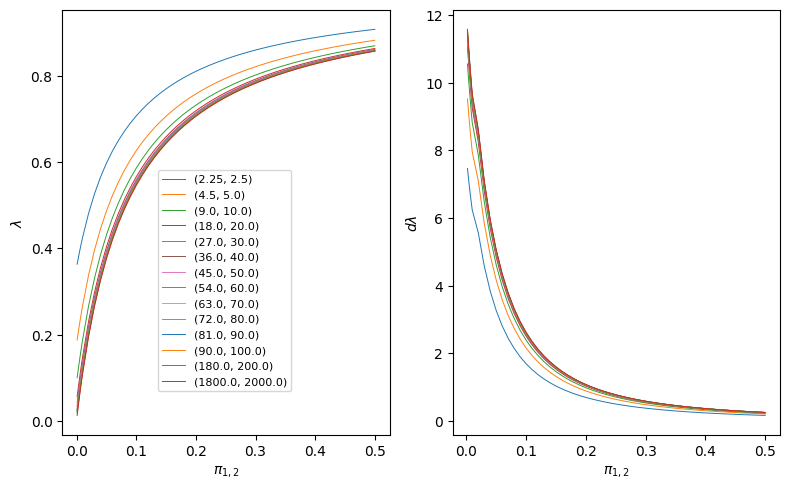

In [56]:
base_q_pair = (9.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,11)]
q_pairs.extend([(180.0, 200.0), (1800.0, 2000.0)])
q_pairs.insert(0, (4.5, 5.0))
q_pairs.insert(0, (2.25, 2.5))
x = 2
fig, ax= plt.subplots(1,2, figsize=(8,5))

for q_pair in q_pairs:
    if not os.path.exists(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv'):
        call(f'python find_Tlines_sym.py {q_pair[0]} {q_pair[1]} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    ax[0].plot(tline['pi'], tline['lambda'], lw=0.7, label=f'{q_pair}')
    dlambda = (np.array(tline['lambda'].iloc[1:]) - np.array(tline['lambda'].iloc[:-1]))/(np.array(tline['pi'].iloc[1:]) - np.array(tline['pi'].iloc[:-1]))
    ax[1].plot(tline.pi[1:], dlambda, lw=0.7)
ax[0].set(xlabel='$\pi_{1,2}$', ylabel='$\lambda$') # , xlim=(0,0.5), ylim=(0,1)
ax[1].set(xlabel='$\pi_{1,2}$', ylabel='$d \lambda$') # , xlim=(0,0.5), ylim=(0,1)
fig.legend(fontsize=8, loc=(0.2,0.2))
fig.tight_layout()